<a href="https://colab.research.google.com/github/elainedias16/TCC/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BBC News Dataset

# Reading the Dataset and Creating the Dataframe

In [382]:
import pandas as pd

id_file = '1m41gWGwnLYo0nAEOABnU_MH_SCQHWfjS'
url_file = 'https://drive.google.com/uc?id={}'.format(id_file)

def create_dataframe(path):
    columns=['genre', 'filename', 'title', 'content']
    df =  pd.read_table(
    path,
    header=None,
    names=columns,
    sep= '\t',
    engine= 'python'
    )
    return df


df = create_dataframe(url_file)
df = df.drop(0).reset_index(drop=True)

df.tail()

,genre,filename,title,content
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...
2224,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,..."


In [383]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import spacy
from spacy.lang.en.examples import sentences

!pip install unidecode
import unidecode
from nltk.stem.porter import PorterStemmer
!python -m spacy download en_core_web_sm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Rename filenames

In [384]:
# In BBC dataset, some filenames have the same name, for example 001.txt, so it's necessary to rename
def rename_filenames(df):
  for index, row in df.iterrows():
      df.at[index, 'filename'] = f"{index}.txt"
  return df

df = rename_filenames(df)

## Create dataset with less samples

In [385]:
import random

# def create_balanced_small_df(df, genres, num):
#   small_df_list = []
#   for genre in genres:
#     sample_rows = df.sample(num)
#     small_df_list.append(sample_rows)
#   return pd.concat(small_df_list).reset_index(drop=True)

def create_imbalanced_small_df(df, genres, max_value):
  small_df_list = []
  for genre in genres:
    qtd = random.randint(1, max_value)
    # print(qtd)
    sample_rows = df[df['genre'] == genre].sample(qtd)
    small_df_list.append(sample_rows)
  return pd.concat(small_df_list).reset_index(drop=True)


In [386]:
genres = df['genre'].unique()
small_df = create_imbalanced_small_df(df, genres, max_value=15)
small_df

,genre,filename,title,content
0,business,253.txt,News Corp eyes video games market,"News Corp, the media company controlled by Au..."
1,business,68.txt,Boeing unveils new 777 aircraft,US aircraft firm Boeing has unveiled its new ...
2,business,113.txt,WorldCom director admits lying,The former chief financial officer at US tele...
3,business,443.txt,Khodorkovsky quits Yukos shares,Jailed tycoon Mikhail Khodorkovsky has transf...
4,business,149.txt,Shares hit by MS drug suspension,Shares in Elan and Biogen Idec plunged on Mon...
5,business,374.txt,S Korean credit card firm rescued,South Korea's largest credit card firm has av...
6,business,321.txt,Tokyo says deflation 'controlled',The Japanese government has forecast that the...
7,business,152.txt,House prices show slight increase,Prices of homes in the UK rose a seasonally a...
8,business,250.txt,MCI shares climb on takeover bid,Shares in US phone company MCI have risen on ...
9,business,156.txt,Khodorkovsky ally denies charges,A close associate of former Yukos boss Mikhai...


# Pre Processing

In [387]:
def remove_non_alphanumeric(text):
    words = ''
    for w in text:
        words += w if w.isalnum() else ' '
    return words

def remove_accents(text):
  return unidecode.unidecode(text)


def lowercasting(tokens):
  tokens = [w.lower() for w in tokens]
  return tokens

def remove_stop_words(tokens):
  stop_words = set(stopwords.words('english')) #List of stop words in english
  tokens = [token for token in tokens if token not in stop_words]
  return tokens


def stemming(tokens):
  porter = PorterStemmer()
  tokens = [porter.stem(token) for token in tokens]
  return tokens


def lemmanization(text):
    nlp = spacy.load("en_core_web_sm")    # Load English language model
    doc = nlp(text)   # Process the text using the Spacy NLP
    tokens = [token.lemma_ for token in doc]
    return tokens


def pre_processing_aux(text):
  words = remove_non_alphanumeric(text)
  words = remove_accents(words)
  tokens = word_tokenize(words)
  tokens = lowercasting(tokens)
  tokens = remove_stop_words(tokens)
  words = ' '.join(tokens)
  tokens = lemmanization(words)
  tokens = stemming(tokens)
  return ' '.join(tokens)


In [388]:
def pre_processing(df):
    df['content'] = df['content'].apply(pre_processing_aux)
    return df

###########################################################
# To prossegue with all dataset, put df on parameter
# To prossegue with small dataset, put small_df in paramter
############################################################

df = pre_processing(small_df)
df.tail()

,genre,filename,title,content
47,tech,2071.txt,Apple sues to stop product leaks,comput firm appl issu lawsuit prevent onlin le...
48,tech,2014.txt,Online commons to spark debate,onlin commun set uk govern could encourag publ...
49,tech,2111.txt,Big war games battle it out,arriv new titl popular medal honor call duti f...
50,tech,2147.txt,Apple attacked over sources row,civil liberti group electron frontier foundat ...
51,tech,2021.txt,Musical future for phones,analyst bill thompson see futur son hand buy s...


# Basic statistics analysis

##Documents number by class

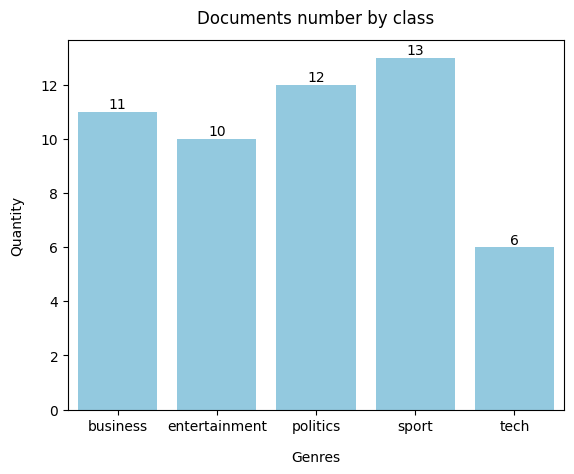

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns

genres = df['genre'].unique()

def plot_doc_by_class(genres):
  ax = sns.countplot(x = 'genre', data = df , color='skyblue')
  ax.yaxis.grid(False)
  plt.title('Documents number by class', pad=12)
  plt.xlabel('Genres', labelpad=12)
  plt.ylabel('Quantity', labelpad=12)

  bars = ax.patches
  # Put numbers of docs above bars
  for bar in bars:
        height = int(bar.get_height())
        plt.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom')

  plt.show()


plot_doc_by_class(genres)

#Top 30 most frequent words

In [390]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn

def get_genre_content(df, genre):
  content = df.loc[df['genre'] == genre, 'content'].str.cat(sep=' ')
  return content

def create_dict_content(df):
  dict_content = {}
  for genre in genres:
      dict_content[genre] = get_genre_content(df, genre)
      if 'all' in dict_content:
        dict_content['all'] += get_genre_content(df, genre)
      else:
          dict_content['all'] = get_genre_content(df, genre)
  return dict_content

def create_count_content(dict_content):
  count_content = {}
  for genre, content in dict_content.items():
      count_content[genre] = Counter(content.split())
  return count_content


def get_top_n_words(top_n, count_words):
    most_common_words = {}
    for word, count in count_words.most_common(top_n):
        most_common_words[word] = count
    return most_common_words


In [391]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def plot_h_most_common_words(top_n, count_content, genre, title, fontsize):
    most_common = get_top_n_words(top_n, count_content[genre])
    most_common = sorted(most_common.items(), key=lambda x: x[1])
    words = [item[0] for item in most_common ]
    counts = [item[1] for item in most_common ]
    plt.figure(figsize=(11, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Quantity', labelpad=15)
    plt.ylabel('Tokens', labelpad=15)
    plt.grid(False)
    plt.title(title, pad=15)
    #Display number of token in front of each bar
    for i in range(len(words)):
      plt.text(counts[i], i, ' ' + str(counts[i]), ha='left', va='center')

dict_content = create_dict_content(df)
count_content = create_count_content(dict_content)

In [392]:
print(count_content)

{'business': Counter({'mr': 44, 'say': 41, 'compani': 24, 'firm': 24, 'year': 23, 'oil': 19, 'yuko': 17, 'would': 16, 'price': 15, 'mci': 13, 'product': 12, 'last': 12, 'ebber': 12, 'khodorkovski': 12, 'see': 12, 'market': 11, 'new': 11, 'plane': 11, 'worldcom': 11, 'analyst': 10, 'boe': 10, '777': 10, 'fall': 10, 'rise': 10, 'game': 9, 'may': 9, 'sinc': 9, 'bank': 9, 'also': 9, 'former': 9, 'sullivan': 9, 'fraud': 9, 'bankruptci': 9, 'russian': 9, 'one': 8, 'busi': 8, '1': 8, 'industri': 8, 'futur': 8, 'we': 8, 'court': 8, 'trial': 8, 'interest': 8, 'hous': 8, 'ongc': 8, 'big': 7, 'tell': 7, 'next': 7, 'buy': 7, 'us': 7, '000': 7, 'airbu': 7, 'month': 7, 'tax': 7, 'countri': 7, 'share': 7, 'india': 7, 'video': 6, '2': 6, '200lr': 6, 'rival': 6, 'small': 6, 'm': 6, 'collaps': 6, 'charg': 6, 'current': 6, 'russia': 6, 'tysabri': 6, 'level': 6, 'card': 6, 'lg': 6, 'januari': 6, '0': 6, 'yugansk': 6, 'long': 5, 'look': 5, 'possibl': 5, 'profit': 5, 'two': 5, 'stock': 5, 'make': 5, 'airlin

##Top 30 most frequent tokens in business

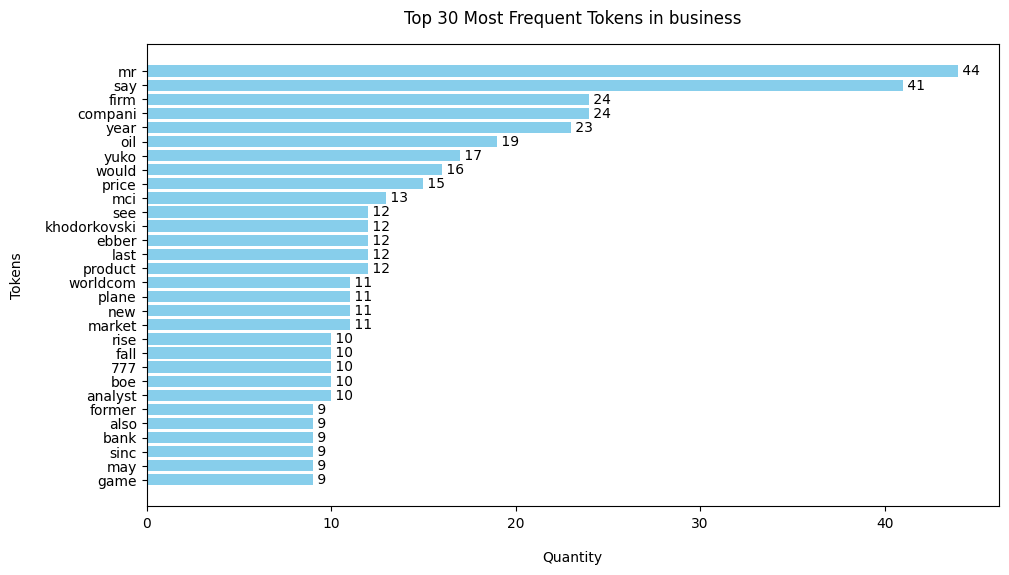

In [393]:
top_n = 30
fontsize = 12
title_business = 'Top {} Most Frequent Tokens in business'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'business', title_business, fontsize)
# common_words_business = get_top_n_words(top_n, count_content['business'])
# print(common_words_business)

##Top 30 most frequent tokens in entertainment




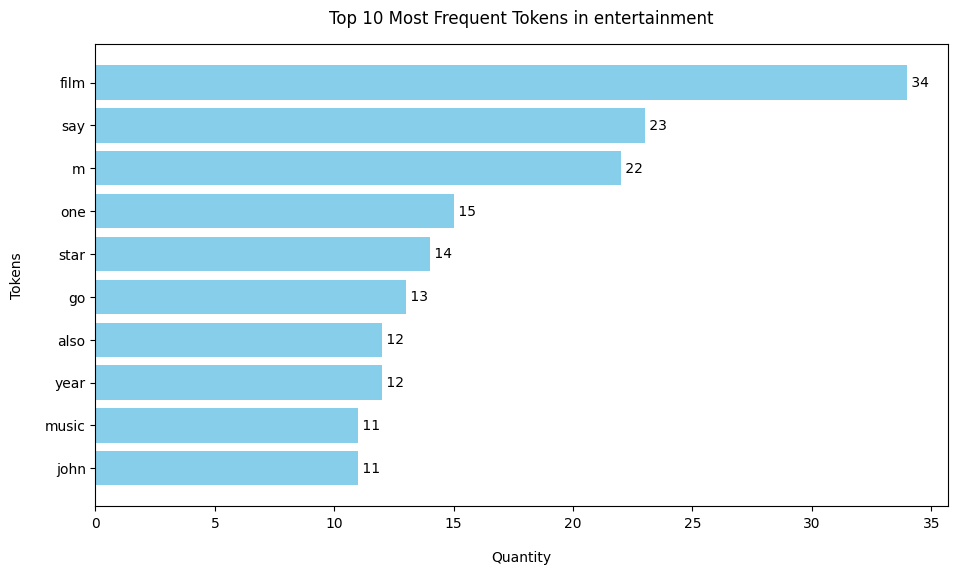

In [394]:
top_n = 10
fontsize = 12
title_entertainment = 'Top {} Most Frequent Tokens in entertainment'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'entertainment', title_entertainment, fontsize)
# common_words_entertainment = get_top_n_words(top_n, count_content['entertainment'])
# print(common_words_entertainment)

##Top 30 most frequent tokens in politics

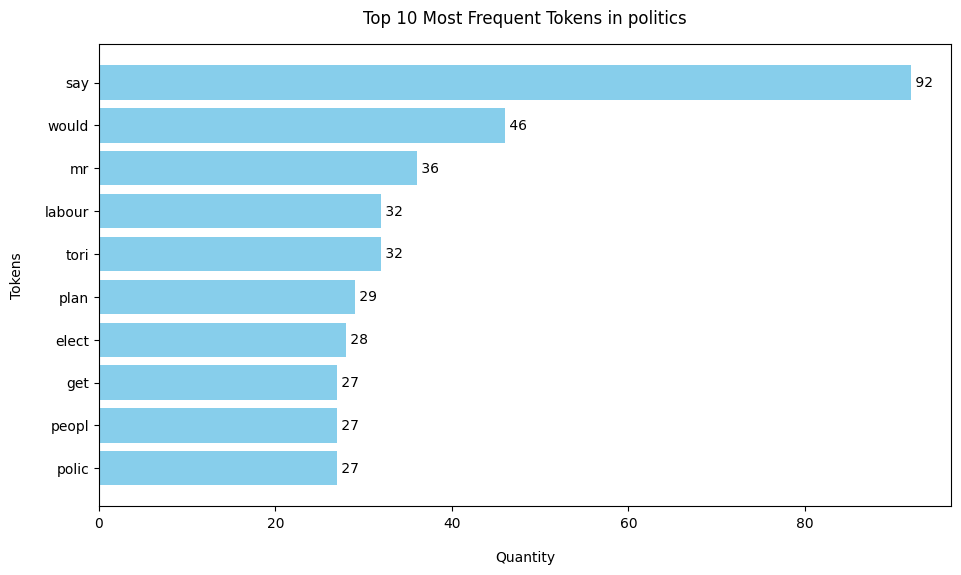

In [395]:
top_n = 10
fontsize = 12
title_politics = 'Top {} Most Frequent Tokens in politics'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'politics', title_politics, fontsize)
# common_words_politics = get_top_n_words(top_n, count_content['politics'])
# print(common_words_politics)

##Top 30 most frequent tokens in sport

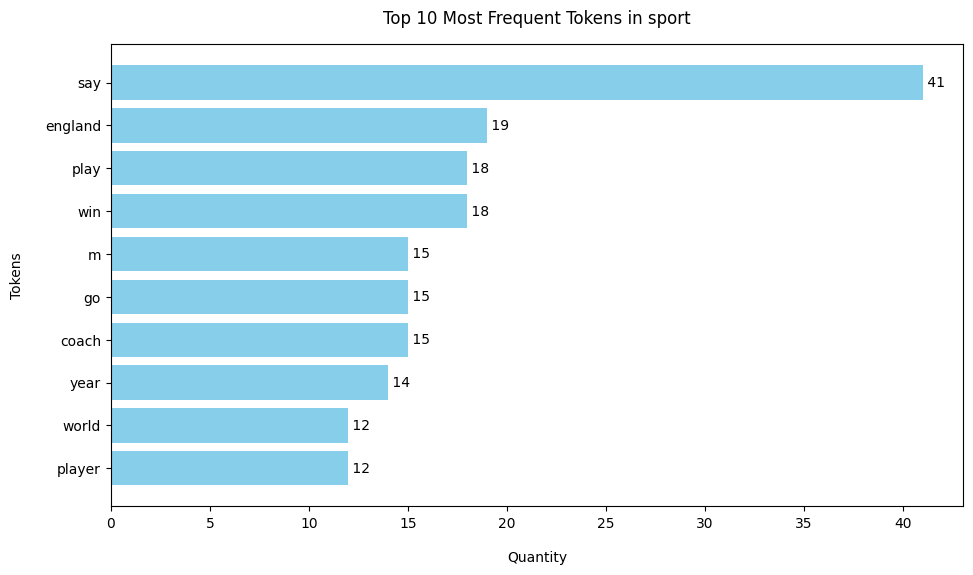

In [396]:
top_n = 10
fontsize = 12
title_sport = 'Top {} Most Frequent Tokens in sport'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'sport', title_sport, fontsize)
# common_words_sport = get_top_n_words(top_n, count_content['sport'])
# print(common_words_sport)

##Top 30 most frequent tokens in tech

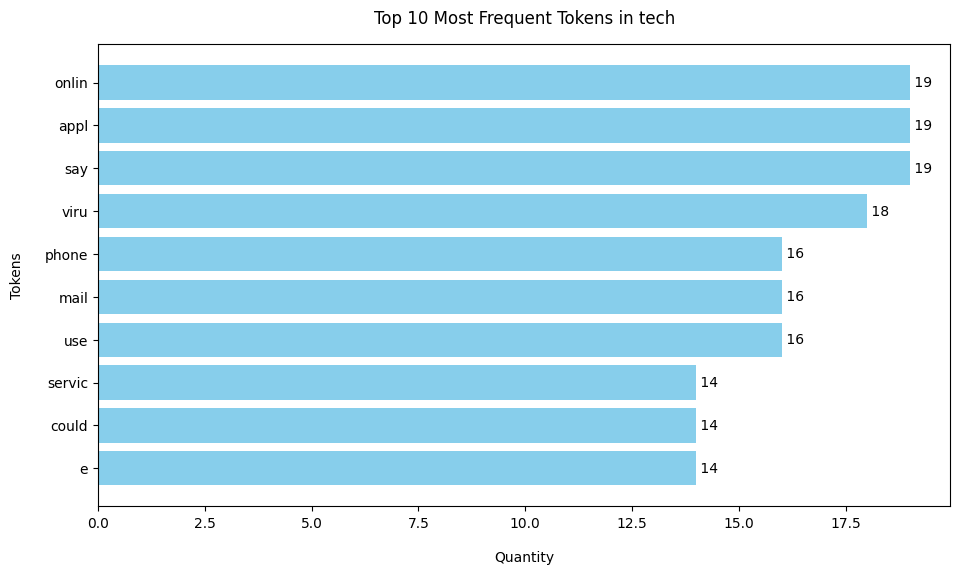

In [397]:
top_n = 10
fontsize = 12
title_tech = 'Top {} Most Frequent Tokens in tech'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'tech', title_tech, fontsize)
# common_words_tech = get_top_n_words(top_n, count_content['tech'])
# print(common_words_politics)

##Top 30 most frequent tokens in all dataset

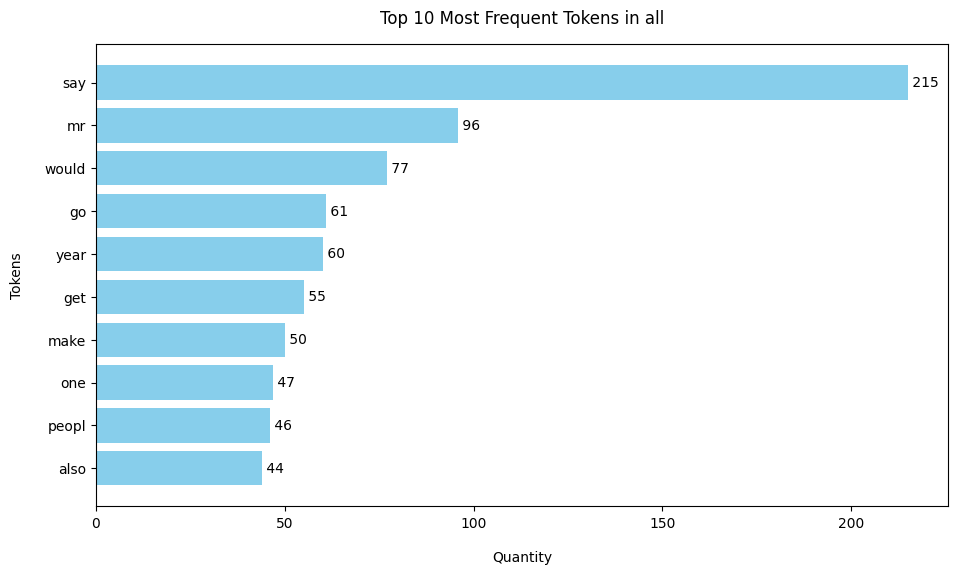

In [398]:
top_n = 10
fontsize = 12
title_all = 'Top {} Most Frequent Tokens in all'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'all', title_all, fontsize)
# common_words_all = get_top_n_words(top_n, count_content['all'])
# print(common_words_all)

#Frequency of class by word

In [399]:
import random

#Choose 10 random tokens in all content of news
random_words = random.sample(dict_content['all'].split(), 3)
print("random words: ", random_words)

def get_counts_by_genre(word, count_genres):
    counts_by_genre = {}  #Dictionary to store word count in each class
    for genre, content_counter in count_genres.items():
        if word in content_counter:
            counts_by_genre[genre] = content_counter[word]  # Adds the word count in the class to the dictionary
    return counts_by_genre


def get_frequency_class_by_word(selected_words, count_genres):
    dict_frequency = {}
    for word in selected_words:
        dict_frequency[word] = get_counts_by_genre(word, count_genres)
    return dict_frequency


dict_frequency = get_frequency_class_by_word(random_words, count_content)
print(dict_frequency)

random words:  ['much', 'one', 'analyst']
{'much': {'business': 2, 'all': 18, 'entertainment': 3, 'politics': 5, 'sport': 6, 'tech': 2}, 'one': {'business': 8, 'all': 47, 'entertainment': 15, 'politics': 10, 'sport': 8, 'tech': 6}, 'analyst': {'business': 10, 'all': 12, 'politics': 1, 'tech': 1}}


In [400]:
#Testing
df[df['genre']=='politics']

,genre,filename,title,content
21,politics,1093.txt,Police chief backs drinking move,chief constabl back introduct 24 drink say pol...
22,politics,1306.txt,Howard's unfinished business,finish yet whisper conserv parti person report...
23,politics,1273.txt,Blair defends terror law changes,prime minist defend measur allow hous arrest w...
24,politics,1121.txt,Tories unveil quango blitz plans,plan abolish 162 quango unveil conserv part ef...
25,politics,1145.txt,What the election should really be about?,gener elect good chanc pressur group get make ...
26,politics,1008.txt,MP's shock at long lost daughter,labour mp stephen pound tell shock joy learn f...
27,politics,1164.txt,Teens 'know little' of politics,teenag question survey show littl interest pol...
28,politics,1108.txt,Lib Dems target the student vote,student decid fate mp seat next elect liber de...
29,politics,951.txt,Citizenship event for 18s touted,citizenship ceremoni could introduc peopl cele...
30,politics,1242.txt,Tories outlining policing plans,local commun would ask go poll elect area poli...


# Frequency of words by documents

In [401]:
from collections import Counter

def get_frequency(df):
    frequency = {}
    for index, row in df.iterrows():
        filename = row['filename']
        word_counts = dict(Counter(row['content'].split()))
        if filename not in frequency:
          frequency[filename] = word_counts
    return frequency



frequency = get_frequency(df)
print(frequency)


{'253.txt': {'news': 3, 'corp': 3, 'media': 1, 'compani': 5, 'control': 1, 'australian': 1, 'billionair': 1, 'rupert': 1, 'murdoch': 1, 'eye': 1, 'move': 1, 'video': 6, 'game': 9, 'market': 2, 'accord': 1, 'financi': 1, 'time': 1, 'chief': 1, 'oper': 1, 'offic': 1, 'peter': 1, 'chernin': 3, 'say': 4, 'kick': 1, 'tyre': 1, 'pretti': 1, 'much': 1, 'santa': 1, 'monica': 1, 'base': 1, 'activison': 1, 'one': 3, 'firm': 2, 'takeov': 1, 'list': 1, 'big': 3, 'busi': 1, 'paper': 1, 'quot': 1, 'mr': 2, 'would': 1, 'like': 3, 'get': 1, 'success': 1, 'product': 2, 'soni': 1, 'playstat': 1, 'microsoft': 1, 'x': 1, 'box': 1, 'nintendo': 1, 'cube': 1, 'boost': 1, 'demand': 1, 'day': 1, 'arcad': 1, 'classic': 1, 'space': 1, 'invad': 1, 'pac': 1, 'man': 1, 'donkey': 1, 'kong': 1, 'long': 1, 'go': 1, 'today': 1, 'often': 1, 'budget': 1, 'enough': 1, 'featur': 1, 'film': 1, 'look': 2, 'give': 1, 'gamer': 1, 'real': 1, 'experi': 1, 'possibl': 1, 'price': 2, 'tag': 2, 'reflect': 1, 'heavi': 1, 'invest': 1,

In [410]:
df[df['filename']=='253.txt']

,genre,filename,title,content
0,business,253.txt,News Corp eyes video games market,news corp media compani control australian bil...


# Word Index by documents





In [403]:
def create_word_index(df):
    h = {}
    for index, row in df.iterrows():
        filename = row['filename']
        content = row['content']
        words = content.split()
        for word in words:
            if word not in h:
                h[word] = {}

            if filename not in h[word]:
                h[word][filename] = 1
            else:
                h[word][filename] += 1
    return h

word_index = create_word_index(df)
print(word_index)

{'news': {'253.txt': 3, '876.txt': 3, '1273.txt': 1, '1538.txt': 1, '2033.txt': 1, '2014.txt': 1, '2147.txt': 1, '2021.txt': 1}, 'corp': {'253.txt': 3, '398.txt': 1}, 'media': {'253.txt': 1}, 'compani': {'253.txt': 5, '68.txt': 2, '113.txt': 2, '443.txt': 1, '149.txt': 3, '374.txt': 3, '250.txt': 4, '156.txt': 2, '398.txt': 2, '647.txt': 2, '2071.txt': 3, '2021.txt': 1}, 'control': {'253.txt': 1, '443.txt': 2, '374.txt': 1, '1273.txt': 3, '1008.txt': 2, '1242.txt': 2, '1666.txt': 1, '2111.txt': 3}, 'australian': {'253.txt': 1, '1306.txt': 2, '1802.txt': 3, '1714.txt': 2}, 'billionair': {'253.txt': 1}, 'rupert': {'253.txt': 1}, 'murdoch': {'253.txt': 1}, 'eye': {'253.txt': 1, '1437.txt': 1}, 'move': {'253.txt': 1, '374.txt': 1, '1306.txt': 1, '951.txt': 1, '1242.txt': 1, '976.txt': 1, '1538.txt': 1, '2021.txt': 1}, 'video': {'253.txt': 6, '2033.txt': 1, '2111.txt': 1, '2021.txt': 9}, 'game': {'253.txt': 9, '1615.txt': 3, '1666.txt': 1, '1538.txt': 2, '1439.txt': 1, '1519.txt': 1, '2111.

In [411]:
df[df['filename']=='253.txt']

,genre,filename,title,content
0,business,253.txt,News Corp eyes video games market,news corp media compani control australian bil...


# Seach

## Pre processing in seach query

In [412]:
query = 'russian movie'
query = pre_processing_aux(query)
print(query)

russian movi


## Search query

In [413]:
def get_frequency_query(query, word_index):
    query_index = {}
    for word in query.split():
        if word in word_index:
            query_index[word] = word_index[word]
    return query_index


index_query = get_frequency_query(query, word_index)
print(index_query)


def sum_occurrences(index_query):
    f = {}
    for word_dict in index_query.values():
        for filename, count in word_dict.items():
            if filename not in f:
                f[filename] = count
            else:
                f[filename] += count

    return f

occurrences = sum_occurrences(index_query)
print(occurrences)

{'russian': {'443.txt': 2, '156.txt': 2, '398.txt': 5}, 'movi': {'586.txt': 1, '583.txt': 1, '581.txt': 3, '841.txt': 2}}
{'443.txt': 2, '156.txt': 2, '398.txt': 5, '586.txt': 1, '583.txt': 1, '581.txt': 3, '841.txt': 2}


In [414]:
def sort_sum_occurrences(occurrences):
  sorted_occurences = sorted(occurrences.items(), key=lambda x : x[1], reverse=True) #reverse is descr order
  return sorted_occurences


def get_top_n_docs(occurences, top_n):
  occurences = dict(occurences)
  docs = list(occurences.keys())[:top_n]
  return docs

sorted_occurences = sort_sum_occurrences(occurrences)
print(sorted_occurences)

top_n = 5
docs = get_top_n_docs(sorted_occurences, top_n)
print(docs)

[('398.txt', 5), ('581.txt', 3), ('443.txt', 2), ('156.txt', 2), ('841.txt', 2), ('586.txt', 1), ('583.txt', 1)]
['398.txt', '581.txt', '443.txt', '156.txt', '841.txt']


# Classifier

## Define test and training set

In [423]:
from sklearn.model_selection import train_test_split

def create_test_training_split(df, percent):
    train_dfs = []
    test_dfs = []
    grouped = df.groupby('genre')
    for genre, group_df in grouped:
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=percent_test, random_state=42)

        train_df, test_df = train_test_split(group_df, test_size=percent, random_state=42)
        train_dfs.append(train_df)
        test_dfs.append(test_df)

    train_df = pd.concat(train_dfs).reset_index(drop=True)
    test_df = pd.concat(test_dfs).reset_index(drop=True)

    return train_df, test_df


percent_test = 0.2
train_df, test_df = create_test_training_split(df, percent_test)

In [424]:
test_df

,genre,filename,title,content
0,business,374.txt,S Korean credit card firm rescued,south korea larg credit card firm avert liquid...
1,business,253.txt,News Corp eyes video games market,news corp media compani control australian bil...
2,business,156.txt,Khodorkovsky ally denies charges,close associ former yuko boss mikhail khodorko...
3,entertainment,841.txt,Incredibles win animation awards,incred movi beat shrek 2 main prize hollywood ...
4,entertainment,586.txt,DVD review: Spider-Man 2,univers rule film either superhero special eff...
5,politics,917.txt,"Nat Insurance to rise, say Tories",nation insur rais labour win next elect tori l...
6,politics,1242.txt,Tories outlining policing plans,local commun would ask go poll elect area poli...
7,politics,1093.txt,Police chief backs drinking move,chief constabl back introduct 24 drink say pol...
8,sport,1344.txt,Bekele sets sights on world mark,olymp 10 000 m champion kenenisa bekel determi...
9,sport,1394.txt,Greek duo cleared in doping case,sprinter kosta kenteri katerina thanou clear d...
